### Step 1: Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('Titanic_train.csv')
test_df = pd.read_csv('Titanic_test.csv')

# Display the first few rows of the training dataset
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Check for missing values in the training dataset
train_missing_values = train_df.isnull().sum()

# Check for missing values in the test dataset
test_missing_values = test_df.isnull().sum()

train_missing_values, test_missing_values

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Set the style for the plots
sns.set(style="whitegrid")

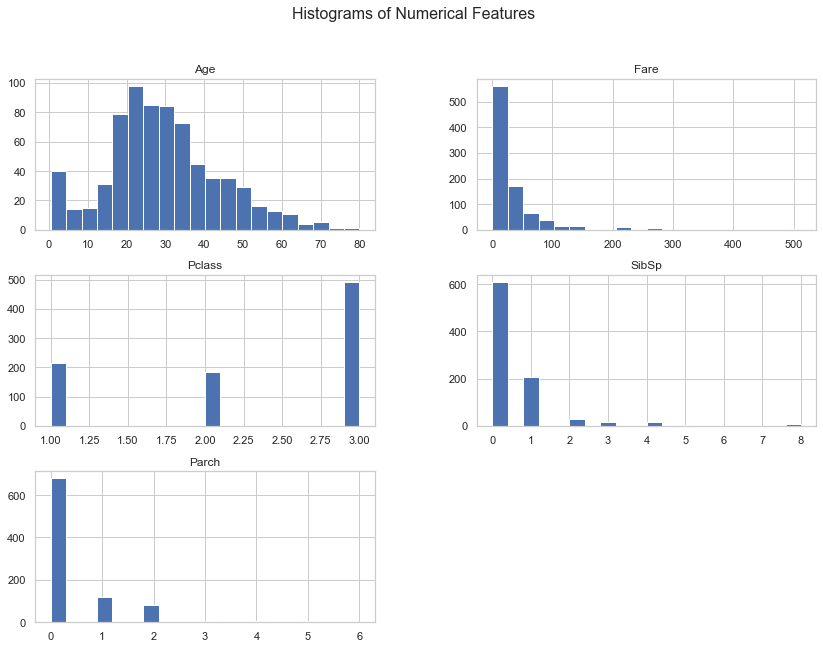

In [5]:
# Plot histograms for numerical features
numerical_features = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']
train_df[numerical_features].hist(bins=20, figsize=(14,10))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

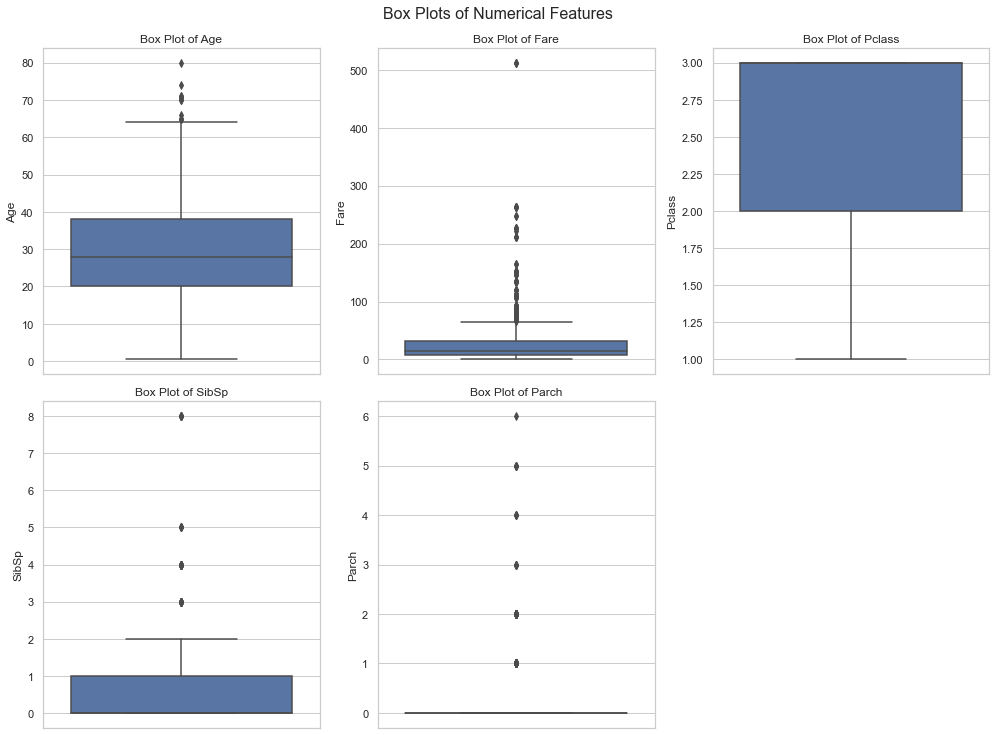

In [6]:
# Plot box plots for numerical features
plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=train_df, y=feature)
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.suptitle("Box Plots of Numerical Features", y=1.02, fontsize=16)
plt.show()

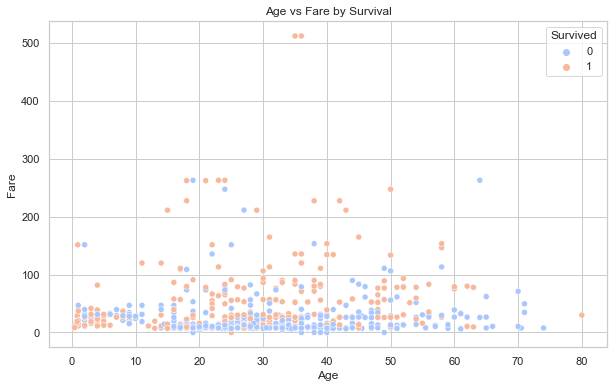

In [7]:
# Scatter plot for Age vs Fare colored by survival
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='Age', y='Fare', hue='Survived', palette='coolwarm')
plt.title('Age vs Fare by Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

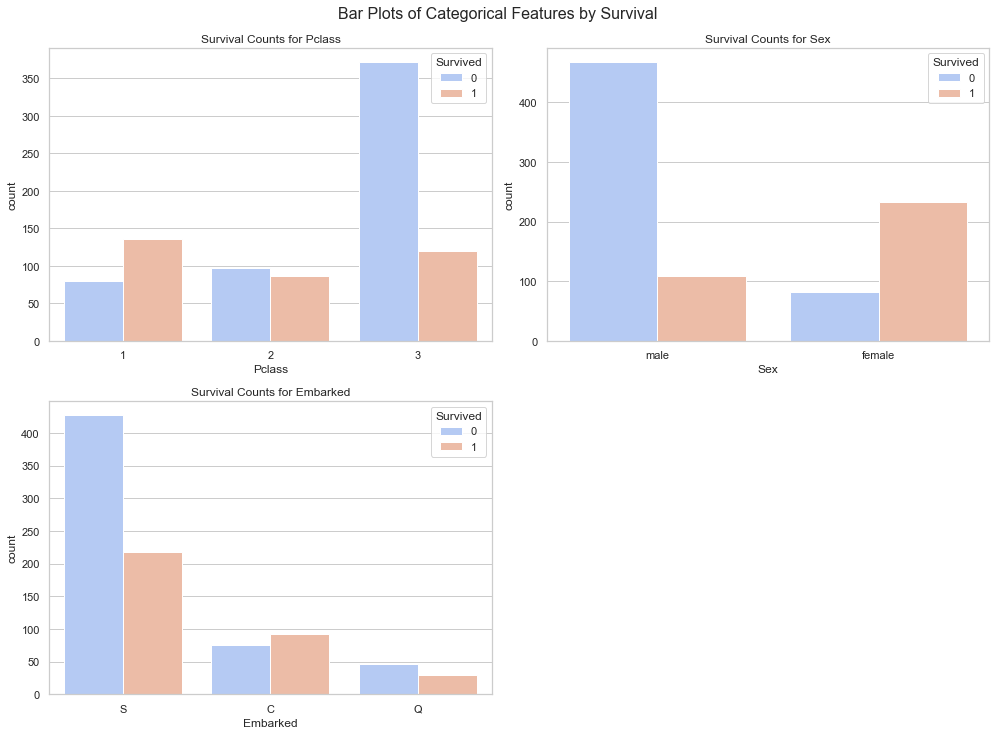

In [8]:
# Bar plot for categorical features
categorical_features = ['Pclass', 'Sex', 'Embarked']
plt.figure(figsize=(14, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=train_df, x=feature, hue='Survived', palette='coolwarm')
    plt.title(f'Survival Counts for {feature}')
plt.tight_layout()
plt.suptitle("Bar Plots of Categorical Features by Survival", y=1.02, fontsize=16)
plt.show()

### Step 2: Data Preprocessing

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [10]:
# Separate features and target variable in the training data
X_train_full = train_df.drop(columns='Survived')
y_train_full = train_df['Survived']

In [11]:
# Impute missing values and encode categorical variables
num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Embarked']

In [12]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ]
)

In [13]:
# Fit and transform the training data
X_train_transformed = preprocessor.fit_transform(X_train_full)

In [14]:
# Get feature names for numerical features
num_feature_names = num_features

In [15]:
# Get feature names for categorical features after OneHotEncoding
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_features)

In [16]:
# Combine all feature names
feature_names = num_feature_names + list(cat_feature_names)

In [17]:
# Create DataFrame with transformed features and appropriate column names
X_train_full = pd.DataFrame(X_train_transformed, columns=feature_names)

In [18]:
# Transform the test data using the same preprocessor
X_test_transformed = preprocessor.transform(test_df)
X_test_full = pd.DataFrame(X_test_transformed, columns=feature_names)

In [19]:
# Ensure the target variable is added back to the training data
train_df_processed = pd.concat([X_train_full, y_train_full.reset_index(drop=True)], axis=1)

In [20]:
# Display the first few rows of the preprocessed training dataset
train_df_processed.head()

,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Survived
0,22.0,7.2500,0.0,1.0,0.0,0.0,1.0,0.0,0
1,38.0,71.2833,1.0,0.0,1.0,0.0,0.0,0.0,1
2,26.0,7.9250,1.0,0.0,0.0,0.0,1.0,0.0,1
3,35.0,53.1000,1.0,0.0,0.0,0.0,1.0,0.0,1
4,35.0,8.0500,0.0,1.0,0.0,0.0,1.0,0.0,0


### Step 3: Building Predictive Models

In [21]:
# Define the features and target
X = train_df_processed.drop(columns='Survived')
y = train_df_processed['Survived']

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import xgboost as xgb

In [24]:
# LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000116 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 181
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [25]:
# XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

[13:02:58] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


### Step 4: Comparative Analysis

In [26]:
# Evaluate the models
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

In [27]:
lgb_metrics = evaluate_model(y_test, y_pred_lgb)
xgb_metrics = evaluate_model(y_test, y_pred_xgb)

lgb_metrics, xgb_metrics

((0.776536312849162, 0.75, 0.6891891891891891, 0.7183098591549296),
 (0.776536312849162, 0.75, 0.6891891891891891, 0.7183098591549296))

In [28]:
import matplotlib.pyplot as plt

# Performance metrics
metrics_df = pd.DataFrame({
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'LightGBM': lgb_metrics,
    'XGBoost': xgb_metrics
})

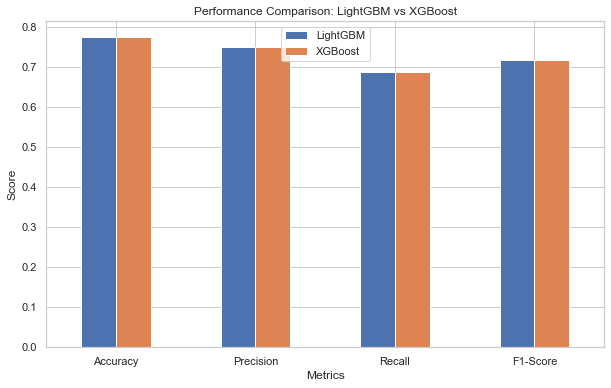

In [29]:
# Plot the performance metrics
metrics_df.set_index('Metrics').plot(kind='bar', figsize=(10, 6), rot=0)
plt.title('Performance Comparison: LightGBM vs XGBoost')
plt.ylabel('Score')
plt.show()